In [1]:
import re
import nltk
from nltk.tokenize import word_tokenize


def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

def lowercase_text(text):
    return text.lower()

nltk.download('stopwords')
stopwords = nltk.corpus.stopwords

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    filtered_text = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(filtered_text)


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

def vectorize_tfidf(text_data):
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)
    return tfidf_matrix

import spacy

def get_word_embeddings(text):
    nlp = spacy.load('en_core_web_md')
    doc = nlp(text)
    return doc.vector

In [23]:
import pandas as pd
df = pd.read_csv('seperate.csv')
df.head()

In [25]:
# Assuming you have a DataFrame df with a 'text' column
df['cleaned_text'] = df['text'].apply(clean_text)
df['cleaned_text'] = df['cleaned_text'].apply(lowercase_text)
df['cleaned_text'] = df['cleaned_text'].apply(remove_stopwords)

https://www.kaggle.com/datasets/leadbest/googlenewsvectorsnegative300/

In [28]:
# Choose either TF-IDF or Word Embeddings
# For TF-IDF:
tfidf_matrix = vectorize_tfidf(df['cleaned_text'])

# For Word Embeddings:
#df['word_embeddings'] = df['cleaned_text'].apply(get_word_embeddings)

In [35]:
import pandas as pd
from gensim.models import KeyedVectors
import nltk
import numpy as np

# Assuming 'lemmatized-comment' column contains the preprocessed text
df.dropna(subset=['cleaned_text'], inplace=True)

# Load the GoogleNews Word2Vec model
google_news_model_path = 'GoogleNews-vectors-negative300.bin'
word2vec_model = KeyedVectors.load_word2vec_format(google_news_model_path, binary=True)
print("Loaded the model")

count = 0
def generate_word_embeddings(tokens):
    global count
    word_embeddings = []
    for word in tokens:
        if word in word2vec_model:
            word_embedding = word2vec_model[word]
            word_embeddings.append(word_embedding)
    count += 1
    if count % 1000 == 0:
        print(count)
    return np.mean(word_embeddings, axis=0) if word_embeddings else np.zeros(word2vec_model.vector_size)

# Tokenize the lemmatized comments
df['tokens'] = df['cleaned_text'].apply(lambda x: nltk.word_tokenize(x))

# Generate word embeddings for each document
df['word-embeddings'] = df['tokens'].apply(generate_word_embeddings)

# Save the processed data with word embeddings
df.to_csv("data_with_word_embeddings.csv", index=False)


Loaded the model
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000

In [36]:
df.head()

,text,Subject,cleaned_text,tokens,word-embeddings
0,Here is our forecast\n\n,NaN,forecast,[forecast],"[-0.12890625, -0.2109375, 0.125, 0.21289062, -..."
1,Traveling to have a business meeting takes the...,Re:,traveling business meeting takes fun trip espe...,"[traveling, business, meeting, takes, fun, tri...","[0.011914266, 0.05225179, 0.0010156758, 0.0672..."
2,test successful. way to go!!!,Re: test,test successful way go,"[test, successful, way, go]","[-0.037597656, 0.059265137, -0.010894775, 0.07..."
3,"Randy,\n\n Can you send me a schedule of the s...",NaN,randy send schedule salary level everyone sche...,"[randy, send, schedule, salary, level, everyon...","[6.2942505e-05, 0.038546085, 0.0038108826, 0.1..."
4,Let's shoot for Tuesday at 11:45.,Re: Hello,lets shoot tuesday,"[lets, shoot, tuesday]","[0.041666668, 0.039245605, 0.1233724, 0.100423..."


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming you have decided on the number of clusters (replace 'n_clusters' accordingly)
kmeans = KMeans(n_clusters=5, random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(tfidf_matrix)

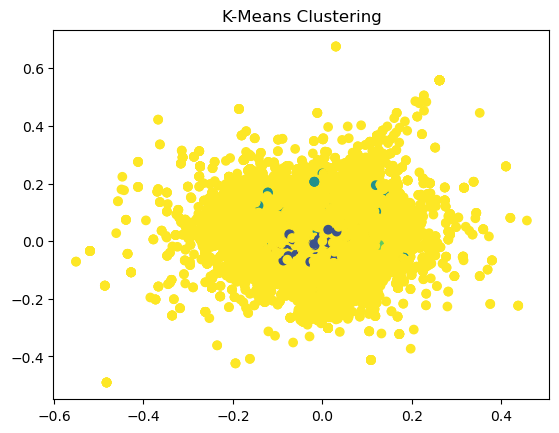

In [39]:
import numpy as np

# Assuming 'word-embeddings' column contains the word embeddings
embeddings_matrix = np.array(df['word-embeddings'].to_list())

# Scatter plot for K-Means Clustering
plt.scatter(embeddings_matrix[:, 0], embeddings_matrix[:, 1], c=df['kmeans_cluster'], cmap='viridis')
plt.title('K-Means Clustering')
plt.show()


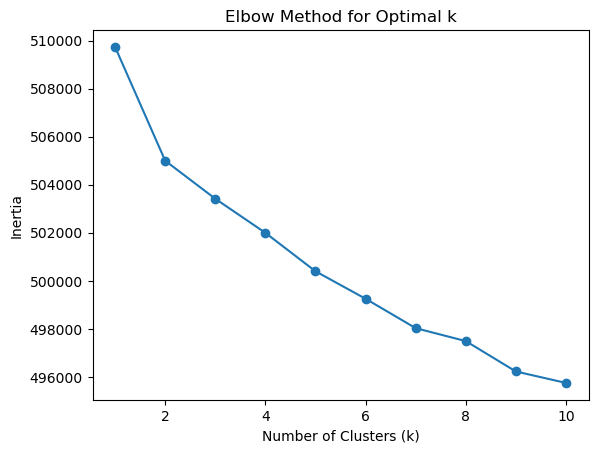

In [40]:
# Elbow Method to find the optimal number of clusters
inertia = []

for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(tfidf_matrix)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


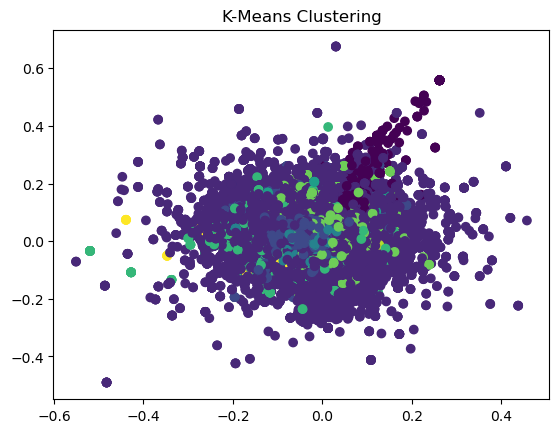

In [41]:
# https://vitalflux.com/k-means-elbow-point-method-sse-inertia-plot-python

# there might be room fore more cluster analysis but the above code ran for 6 and half hours, so we will go with the known information
# and use 10 clusters.

kmeans = KMeans(n_clusters=10, random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(tfidf_matrix)

plt.scatter(embeddings_matrix[:, 0], embeddings_matrix[:, 1], c=df['kmeans_cluster'], cmap='viridis')
plt.title('K-Means Clustering')
plt.show()